In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from math import pi,sqrt
from scipy import special
%matplotlib inline

In [43]:
A=3**(3./2)/2/pi
kf=0.1
D=1
R=0.01
f1=0.256318
l=R
p1=1.34466
kd=4*pi*R*D
ka=kf*kd
P=ka/(3*sqrt(2)*D*l)
C=-A*P/(1+P*(p1-1))**2
td=l*l/6/D


def p(t):
    #t1=(ka/(4*pi*R**3))*(1+kf)
    t1=ka*R/(2*(ka+kd)*sqrt(pi*D))
    #tau=D*(1+kf)**2/R/R
    tau=t
    return t1*tau**(-3/2)

def Ht(t):
    t1=(-C/2/sqrt(pi))
    n=6*D/l/l
    n=n*t
    return t1*n**(-3/2)/td

def phix(x):
    return special.erfcx(x)

def f(t):
    x = t**0.5
    return (1./math.pi**0.5 /x - phix(x))

def f2(t):
    return 0.5*t**(-3/2)/sqrt(pi)

def theorykaf(tt):
    ka = kd * kf
    tmol = R*R/D/(1+ka/kd)**2
    tau = tt/tmol
    Nfactor = (ka*(1+ka/kd)*D/kd/R/R)
    plt.loglog(tt,f(tau)*Nfactor,'g-')
    
def theorykaf2(tt):
    ka = kd * kf
    tmol = R*R/D/(1+ka/kd)**2
    tau = tt/tmol
    Nfactor = (ka*(1+ka/kd)*D/kd/R/R)
    plt.loglog(tt,f2(tau)*Nfactor,'r-')    
    

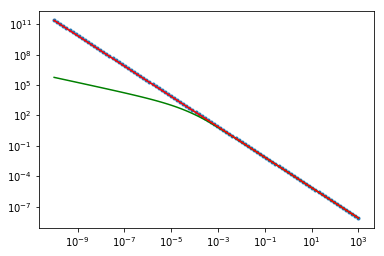

In [46]:
t=np.logspace(-10,3,100)
#plt.loglog(t,p(t),'-.')
plt.loglog(t,Ht(t),'.')
theorykaf(t)
theorykaf2(t)